# Using Random Forest Classifier on the Wine Quality data

### Imports

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore') #remove the warning messages
%matplotlib inline

### Read and clean data

In [3]:
wine_data = pd.read_csv('./winequality-red.csv',sep=";")#Reading the data

In [4]:
wine_data.duplicated().sum()#Checking for duplicated rows

240

In [5]:
wine_data.drop_duplicates(inplace = True)#Remove any duplicates
wine_data.duplicated().sum()

0

In [6]:
wine_data.isna().sum()#Checking for missing data

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Exploring the data

In [7]:
wine_data.describe()#Shows some information about each row

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine_data.info()#Shows the datatypes and the size of the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [9]:
wine_data.quality.unique()#Shows how many classes we have

array([5, 6, 7, 4, 8, 3])

The data is already cleaned.

In [10]:
wine_data.columns[:-1]#Shows the features we have

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

#### Histograms

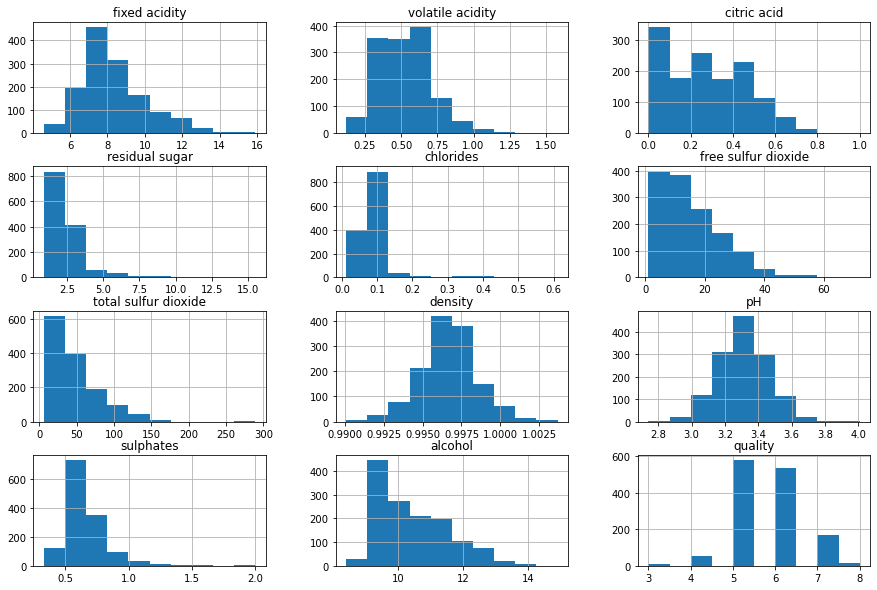

In [11]:
wine_data.hist(figsize=(15, 10));

#### Correlation heat map

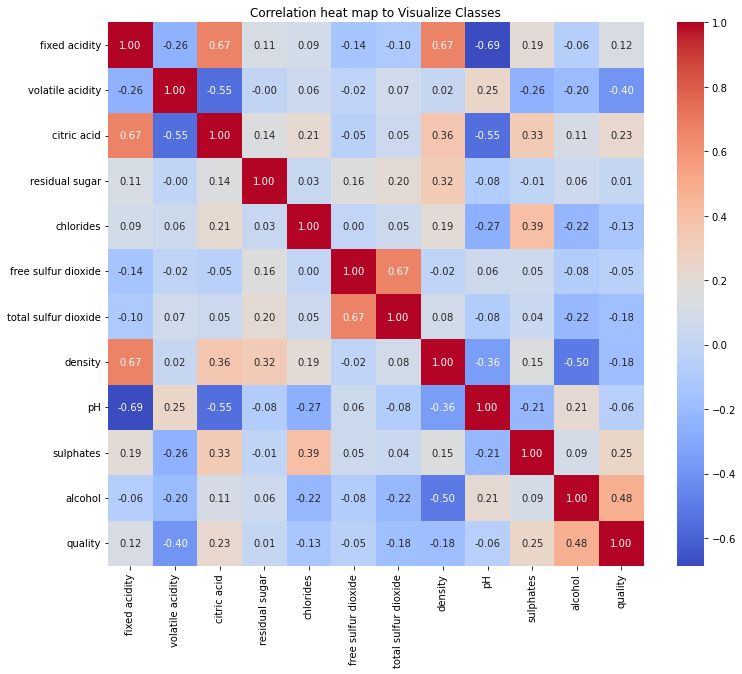

In [12]:
plt.figure(figsize=(12,10))
plt.title("Correlation heat map to Visualize Classes")
sns.heatmap(wine_data.corr(),annot=True, cmap='coolwarm',fmt='.2f');

#### PCA visualization for the classes

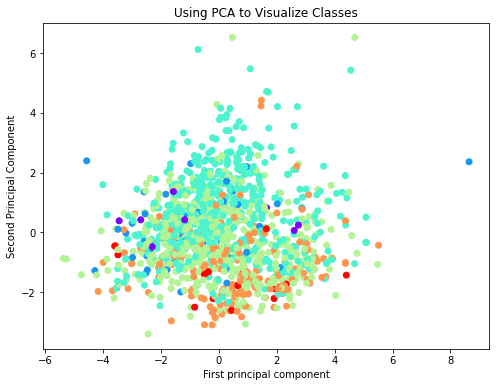

In [13]:
df_pca = wine_data.copy()
X_pca = df_pca.iloc[:, :-1]
y_pca = df_pca['quality']

X_pca.tail()

#Preprocessing in preparation for PCA: Standardizing the predictor variables
X_pca = StandardScaler().fit_transform(X_pca)

#Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

X_pca.shape

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_pca,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title("Using PCA to Visualize Classes")
plt.show()

### Splitting the data into train and test

In [14]:
#Split data into training and test sets
X = wine_data.drop(['quality'],axis = 1)
Y = wine_data['quality']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state=42)

### Initializing the model and the parameters for the grid search and training

In [15]:
#Initialize the classifier
winequalityclassifier = RandomForestClassifier(random_state=417)
kfold = 3

#Create a list of parameters you want to tune
param_grid_RFC = { 
    'n_estimators': [ 3,4,5,6,8,10, 20, 30, 40, 50, 75, 100, 200, 400, 500, 700, 800,1000],
    'max_depth': [7,8,9,10,11,12,13,14,15,30,40,50,100,200,300],
    'criterion' : ['gini', 'entropy']
}

#Fit the model using grid search
CV_rfc = GridSearchCV(estimator=winequalityclassifier, param_grid=param_grid_RFC, cv= kfold)
CV_rfc.fit(x_train, y_train)
#Use the model with the best parameters to test it with the testing data
y_pred = CV_rfc.predict(x_test)
#Print the result of best hyperparameters
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 500}


### Plotting the confusion matrix

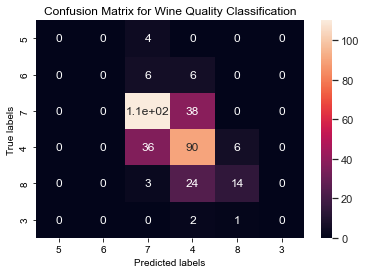

In [16]:
cm = confusion_matrix(y_test, y_pred)#Get the confusion matrix
df_cm = pd.DataFrame(cm)
ax= plt.subplot()
sns.set()
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12})#Font size
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Wine Quality Classification'); 
ax.xaxis.set_ticklabels(wine_data.quality.unique()); ax.yaxis.set_ticklabels(wine_data.quality.unique());
plt.show()

### The classification report

In [17]:
print(classification_report(y_test, y_pred))#Get the classification report

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        12
           5       0.69      0.74      0.72       148
           6       0.56      0.68      0.62       132
           7       0.67      0.34      0.45        41
           8       0.00      0.00      0.00         3

    accuracy                           0.63       340
   macro avg       0.32      0.29      0.30       340
weighted avg       0.60      0.63      0.61       340

